importing pandas and libraries

In [29]:
import pandas as pd
from matplotlib import pyplot as plt

In [63]:
titanic_train= pd.read_csv("/content/drive/MyDrive/datasets/titanic_train.csv")
titanic_test= pd.read_csv("/content/drive/MyDrive/datasets/titanic_test.csv")
test_ids= titanic_test['PassengerId']

In [31]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [34]:
titanic_train.shape

(891, 12)

In [35]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
titanic_train['Survived'].value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [37]:
list(titanic_train['Survived'].value_counts().keys())

[0, 1]

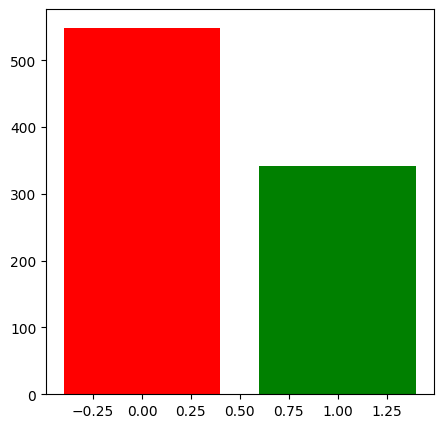

In [38]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()),color=['r','g'])
plt.show()

In [39]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [40]:
titanic_train['Pclass'].unique()

array([3, 1, 2])

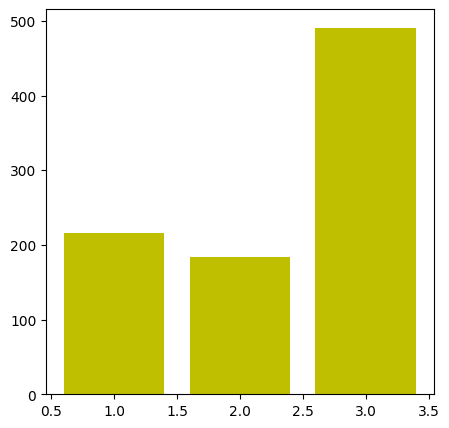

In [41]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()),color='y')
plt.show()

In [42]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

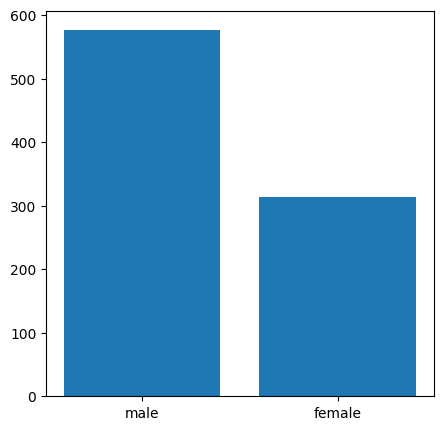

In [43]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()))
plt.show()

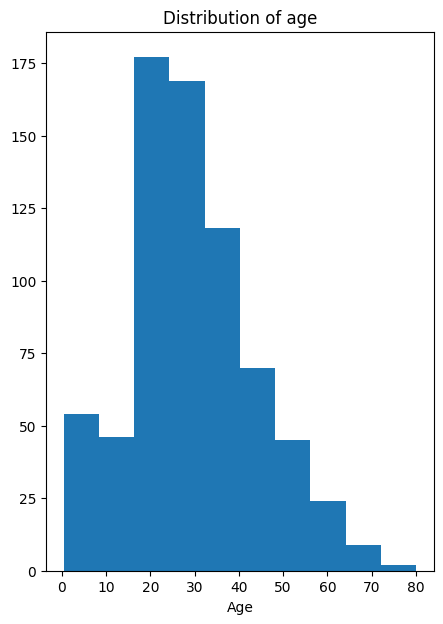

In [44]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title("Distribution of age")
plt.xlabel("Age")
plt.show()

building model

for building the model we can either include the null values or delete the null values

Here we are replacing missing values wtih its median


In [50]:
def clean(data):
  data= data.drop(["Ticket","Cabin","Name","PassengerId"],axis=1)
  cols=['SibSp','Parch','Fare','Age']
  for col in cols:
    data[col].fillna(data[col].median(),inplace=True)

  data.Embarked.fillna("U",inplace= True)
  return data

data= clean(titanic_train)
test= clean(titanic_test)

In [51]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [52]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


We use Label Encoder

In [53]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cols=['Sex','Embarked']
for col in cols:
  data[col]= le.fit_transform(data[col])
  test[col]= le.fit_transform(test[col])
  print(le.classes_)

['female' 'male']
['C' 'Q' 'S']


In [49]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
y= data['Survived']
X= data.drop('Survived',axis=1)
X_train , X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)

Here we use Decision Tree Classifier

In [56]:
dtc= DecisionTreeClassifier(random_state=0)

In [57]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [60]:
predictions= dtc.predict(X_val)
accuracy_score(y_val,predictions)


0.7821229050279329

In [61]:
submission= dtc.predict(test)

In [62]:
submission

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [64]:
df= pd.DataFrame({"PassengerId":test_ids.values,"Survived":submission})

In [65]:
df.to_csv("submission.csv",index=False)